In [1]:
## Import packages 

import numpy as np
from numpy import array
from numpy import histogram as hist
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

In [3]:
def arr2list(img):
    
    list_img = []
    for x in array(img).flat:
        list_img.append(x)
        
    return sorted(list_img)

In [4]:
## x is list of numbers
## num_bins is the number of edges we want in the histogram

def edge_bins(x, num_bins):
    
    step = (max(x) - min(x))/num_bins
    arr2 = np.zeros(num_bins + 1)
    
    for i in range(num_bins):
    
        if num_bins == 1:
            arr2 = [float(min(x)), float(max(x))]
        else:
            arr2[0] = float(min(x))
            if int(i) != (num_bins - 1):
                arr2[i+1] = arr2[i] + float(step)
            else:
                arr2[-1] = float(max(x))
            
    return arr2

In [5]:
# Read image gray
img_gray = rgb2gray(np.array(Image.open('obj1__0.png')))
img_gray

array([[49.4267, 46.9187, 24.9975, ..., 24.9975, 24.9975, 24.9975],
       [24.9975, 24.9975, 24.9975, ..., 24.9975, 24.9975, 24.9975],
       [24.9975, 24.9975, 24.9975, ..., 24.9975, 24.9975, 24.9975],
       ...,
       [24.9975, 24.9975, 24.9975, ..., 24.9975, 24.9975, 24.9975],
       [24.9975, 24.9975, 24.9975, ..., 24.9975, 24.9975, 24.9975],
       [24.9975, 24.9975, 24.9975, ..., 24.9975, 24.9975, 24.9975]])

In [6]:
#  compute histogram of image intensities, histogram should be normalized so that sum of all values equals 1
#  assume that image intensity varies between 0 and 255
#
#  img_gray - input image in grayscale format
#  num_bins - number of bins in the histogram

def normalized_hist(img_gray, num_bins):
    assert len(img_gray.shape) == 2, 'image dimension mismatch'
    assert img_gray.dtype == 'float', 'incorrect image type'
    
    img_gray2 = img_gray/img_gray.sum() ## Normalizing between 0 and 1
    
    x = arr2list(img_gray2)
    y = edge_bins(x, num_bins)
    z = np.split(x,np.searchsorted(x,y))

    final1 = []

    for i in range(len(z)):
        final1.append(len(z[i]))
    
    hists = final1[1::]
    bins = edge_bins(x, num_bins)
    
    ax = plt.hist(img_gray2.ravel(), num_bins)
    plt.show()
    
    return hists, bins

### Comparing the built-in histogram function with our own function

In [7]:
## Built-in

np.histogram(img_gray, 10)

(array([10814,   130,   139,   674,  1372,   935,   644,   814,   855,
            7], dtype=int64),
 array([ 14.4949,  33.6602,  52.8255,  71.9908,  91.1561, 110.3214,
        129.4867, 148.652 , 167.8173, 186.9826, 206.1479]))

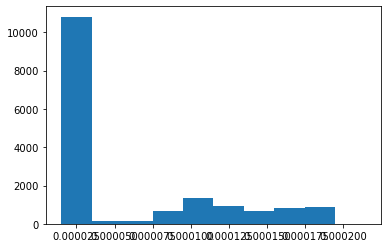

([10814, 130, 139, 674, 1372, 935, 644, 814, 855, 6, 1],
 array([1.50911532e-05, 3.50448250e-05, 5.49984969e-05, 7.49521687e-05,
        9.49058405e-05, 1.14859512e-04, 1.34813184e-04, 1.54766856e-04,
        1.74720528e-04, 1.94674200e-04, 2.14627872e-04]))

In [8]:
## Our own normalized

normalized_hist(img_gray, 10)

### EX 2.B